<a href="https://colab.research.google.com/github/Aditya1BM22CS017/6A-ML-Lab-Batch2/blob/main/1BM22CS017_Lab_8_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("train.csv")

df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


<ipython-input-11-9b199054f456>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-11-9b199054f456>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Accuracy: 0.8212
Confusion Matrix:
[[92 13]
 [19 55]]


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

iris = pd.read_csv("iris.csv")
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with default n_estimators (10): {accuracy:.4f}")

best_accuracy = 0
best_n_estimators = 0

for n_estimators in range(10, 201, 10):
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print(f"Best accuracy: {best_accuracy:.4f} achieved with n_estimators = {best_n_estimators}")

Accuracy with default n_estimators (10): 1.0000
Best accuracy: 1.0000 achieved with n_estimators = 10


AUC Score for n_estimators = 10: 1.0
AUC Score for n_estimators = 20: 1.0
AUC Score for n_estimators = 30: 1.0


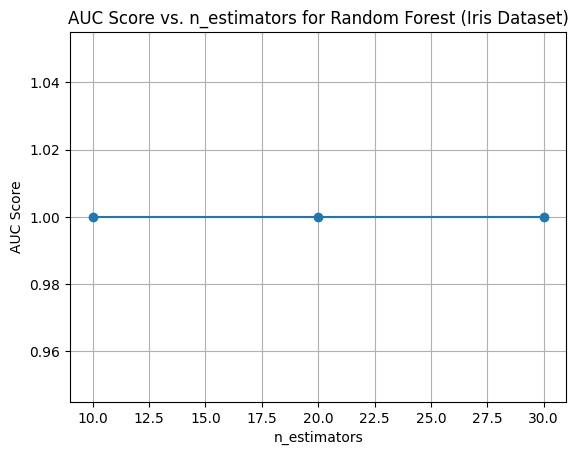

In [12]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

iris = load_iris()
X, y = iris.data, iris.target

y = label_binarize(y, classes=[0, 1, 2])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_estimators_values = [10, 20, 30]

auc_scores = []

for n_estimators in n_estimators_values:

    rf_classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=n_estimators, random_state=42))
    rf_classifier.fit(X_train, y_train)
    y_pred_proba = rf_classifier.predict_proba(X_test)

    auc_scores.append(roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovr'))
    print(f"AUC Score for n_estimators = {n_estimators}: {auc_scores[-1]}")
plt.plot(n_estimators_values, auc_scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('AUC Score')
plt.title('AUC Score vs. n_estimators for Random Forest (Iris Dataset)')
plt.grid(True)
plt.show()